In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set();

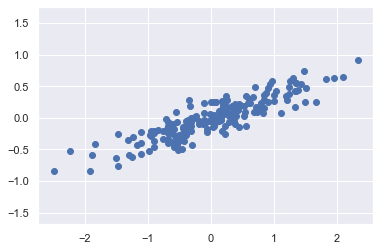

In [4]:
rng=np.random.RandomState(1)
X=np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [8]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

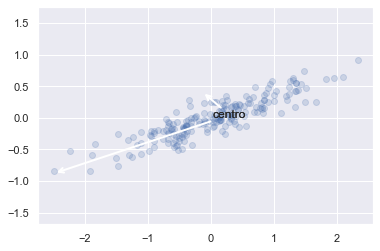

In [15]:
def draw_vector(v0, v1, ax=None):
    ax=ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate('centro',v1,v0, arrowprops=arrowprops)
    
#plot data
plt.scatter(X[:,0],X[:,1], alpha=0.2)
for lenght, vector in zip(pca.explained_variance_,pca.components_):
    v=vector*3*np.sqrt(lenght)
    draw_vector(pca.mean_,pca.mean_ +v)
plt.axis('equal')

In [16]:
pca=PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:  ", X_pca.shape)

original shape:    (200, 2)
transformed shape:   (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.0060642308539953)

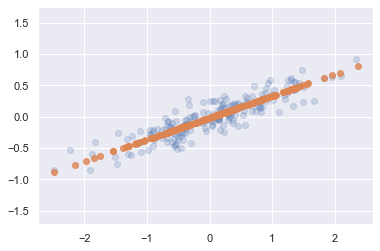

In [18]:
X_new=pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1], alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1], alpha=0.8)
plt.axis('equal')

In [19]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

In [20]:
pca=PCA(2)
proyected=pca.fit_transform(digits.data)
print(digits.data.shape)
print(proyected.data.shape)

(1797, 64)
(1797, 2)


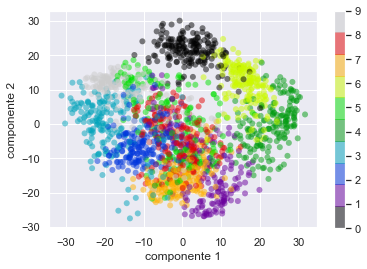

In [27]:
plt.scatter(proyected[:,0], proyected[:,1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.colorbar();

In [24]:
import matplotlib.cm
print(matplotlib.cm.cmap_d.keys())

KeysView(<matplotlib.cm._DeprecatedCmapDictWrapper object at 0x00000234999CC280>)


In [25]:
import matplotlib.pyplot as plt
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

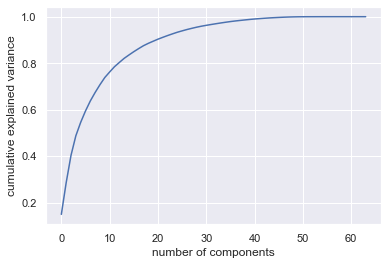

In [29]:
pca=PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

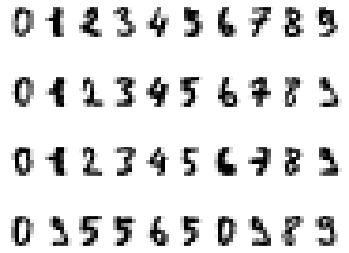

In [36]:
def plot_digits(data):
    fig, axes =plt.subplots(4, 10, figsize=(6,5),
                           subplot_kw={'xticks':[],'yticks':[]},
                           gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8 ,8),
                 cmap='binary', interpolation='nearest',
                 clim=(0,16))
#invocando a la funcion creada        
plot_digits(digits.data)        

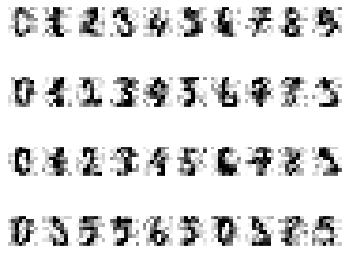

In [37]:
np.random.seed(42)
noisy=np.random.normal(digits.data, 4)
plot_digits(noisy)

In [38]:
pca=PCA(0.50).fit(noisy)
pca.n_components_

12

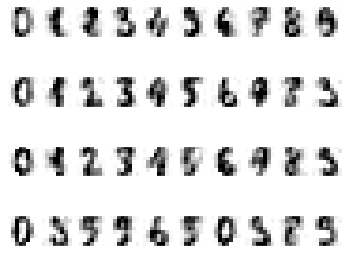

In [40]:
components=pca.transform(noisy)
filtered=pca.inverse_transform(components)
plot_digits(filtered)

In [ ]:
# from sklearn.datasets import fetch_lfw_people
# faces=fetch_lfw_people(min_faces_per_person=60)
# print(faces.target_names)
# print(faces.images.shape)